In [2]:
# Importing Standard Libraries
import graphviz
import pandas as pd
import numpy as np
from csv import reader

# Sklearn Libraries
from sklearn import tree
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import *
from sklearn.naive_bayes import *
from sklearn.cluster import KMeans, DBSCAN
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import export_graphviz, export_text
import pydotplus

# Importing mlxtend Libraries
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Graphing Libraries
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
np.random.seed(0)

# Importing the Data Set
# df =  pd.read_csv("bank.csv")
df =  pd.read_csv("bank-full.csv")
df.head()

# Establishing copies for running through the different scrubs
df_a = df.copy()
df_b = df.copy()

#### Feature Engineering

In [4]:
# Creating Categories for ages then making categories
df_b['job'] = df_b['job'].astype('category')
df_b['job'] = df_b['job'].cat.codes
df_b['marital'] = df_b['marital'].astype('category')
df_b['marital'] = df_b['marital'].cat.codes
df_b['education'] = df_b['education'].astype('category')
df_b['education'] = df_b['education'].cat.codes
df_b['default'] = df_b['default'].astype('category')
df_b['default'] = df_b['default'].cat.codes
df_b['contact'] = df_b['contact'].astype('category')
df_b['contact'] = df_b['contact'].cat.codes
df_b['month'] = df_b['month'].astype('category')
df_b['month'] = df_b['month'].cat.codes
df_b['poutcome'] = df_b['poutcome'].astype('category')
df_b['poutcome'] = df_b['poutcome'].cat.codes
df_b['housing'] = df_b['housing'].astype('category')
df_b['housing'] = df_b['housing'].cat.codes
df_b['loan'] = df_b['loan'].astype('category')
df_b['loan'] = df_b['loan'].cat.codes
df_b['y'] = df_b['y'].astype('category')
df_b['y'] = df_b['y'].cat.codes
df_b = df_b.drop('pdays',axis=1)
df_b['balance'] = (df_b['balance'] - df_b['balance'].min()) / ( df_b['balance'].max() - df_b['balance'].min())
print("Post Conversion of Data into numeric, dropping pdays, and normalizing balance:")
df_b.head(10)

Post Conversion of Data into numeric, dropping pdays, and normalizing balance:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,58,4,1,2,0,0.092259,1,0,2,5,8,261,1,0,3,0
1,44,9,2,1,0,0.073067,1,0,2,5,8,151,1,0,3,0
2,33,2,1,1,0,0.072822,1,1,2,5,8,76,1,0,3,0
3,47,1,1,3,0,0.086476,1,0,2,5,8,92,1,0,3,0
4,33,11,2,3,0,0.072812,0,0,2,5,8,198,1,0,3,0
5,35,4,1,2,0,0.074901,1,0,2,5,8,139,1,0,3,0
6,28,4,2,2,0,0.076862,1,1,2,5,8,217,1,0,3,0
7,42,2,0,2,1,0.072822,1,0,2,5,8,380,1,0,3,0
8,58,5,1,0,0,0.073902,1,0,2,5,8,50,1,0,3,0
9,43,9,2,1,0,0.078187,1,0,2,5,8,55,1,0,3,0


#### Exploratory Data Analysis

In [5]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int64  
 1   job        45211 non-null  int8   
 2   marital    45211 non-null  int8   
 3   education  45211 non-null  int8   
 4   default    45211 non-null  int8   
 5   balance    45211 non-null  float64
 6   housing    45211 non-null  int8   
 7   loan       45211 non-null  int8   
 8   contact    45211 non-null  int8   
 9   day        45211 non-null  int64  
 10  month      45211 non-null  int8   
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  previous   45211 non-null  int64  
 14  poutcome   45211 non-null  int8   
 15  y          45211 non-null  int8   
dtypes: float64(1), int64(5), int8(10)
memory usage: 2.5 MB


In [6]:
df_b.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,4.339762,1.167725,1.224813,0.018027,0.085171,0.555838,0.160226,0.640242,15.806419,5.523014,258.163080,2.763841,0.580323,2.559974,0.116985
std,10.618762,3.272657,0.608230,0.747997,0.133049,0.027643,0.496878,0.366820,0.897951,8.322476,3.006911,257.527812,3.098021,2.303441,0.989059,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,0.073457,0.000000,0.000000,0.000000,8.000000,3.000000,103.000000,1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,0.076871,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,0.085768,1.000000,0.000000,2.000000,21.000000,8.000000,319.000000,3.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,275.000000,3.000000,1.000000


The Descriptions from the data right now show that the data is displaying a lot of different scales.
Namely the following
- Age
- previous
- Duration
- Month
- Day <br>

This Leads us to believe that we need to standardize the data to bring them into scale so that our
different models are not affected disproportionately

<AxesSubplot:>

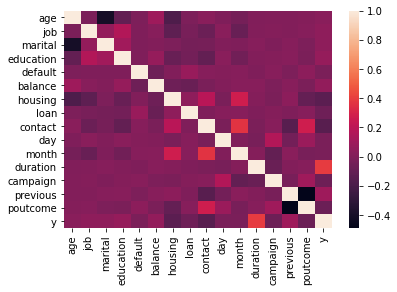

In [7]:
sns.heatmap(df_b.corr())

From the Correlation Map we can see that Y has a high correlation with marital status followed by education and housing.


Splitting the Data into X and Y

In [8]:
y = df_b["y"]
X = df_b.drop("y", axis=1)

Taking another look at the correlation of only the features

<AxesSubplot:>

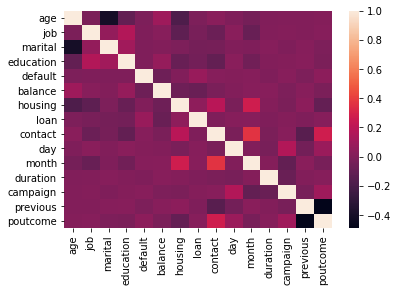

In [9]:
sns.heatmap(X.corr())

Setting the data up into training and testing splits

In [10]:
# Splitting the dataset into Train Set and Test Set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

Displaying General PCA

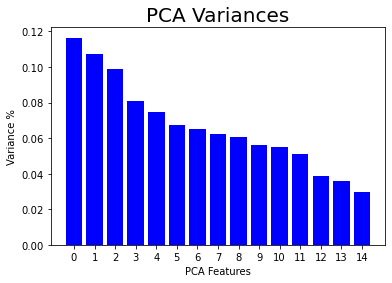

In [11]:
# Standardizing the data
X_std = StandardScaler().fit_transform(df_b.drop("y", axis=1))

# Create a PCA instance
pca = PCA(n_components=15)
principalComponents =pca.fit_transform(X_std)

# Plotting the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='b')
plt.xlabel('PCA Features')
plt.ylabel('Variance %')
plt.xticks(features)
plt.title("PCA Variances", fontsize=20)
plt.show()

Now I want to look at reducing the number of features and get rid of any correlation between the two

First I will want to scale the data

The Function Below Gathers the Accuracies for the different amount of components for PCA

In [12]:
def gather_model_accuracies(model_type, name):
    """This function takes in Different Classifiers to gather accuracies"""
    accuracy = []
    for i in range(1,16):
        # pipe = Pipeline([('scalar', StandardScaler()),
        #                  ('preprocessor', PCA(n_components=i, random_state=0)),
        #                  ('clf', model_type)])
        pipe = Pipeline([('preprocessor', PCA(n_components=i, random_state=0)),
                         ('clf', model_type)])
        pipe.fit(X_train, y_train)
        y_prediction = pipe.predict(X_test)
        accuracy.append(accuracy_score(y_test, y_prediction))
    accuracy = pd.DataFrame(accuracy, index=[i for i in range(1,16)], columns=[name])
    return accuracy

The Function Below Graphs the Accuracies Gathered from above

In [13]:
def graph_accuracies(model_type, model_name):
    """This Function Graphs The Accuracies"""
    x = model_type.index.tolist()
    y = model_type.iloc[:,0].tolist()
    fig, ax = plt.subplots(1, figsize=(5,5))
    sns.lineplot(x=x, y=y, linewidth=4, color='b', ax=ax)
    ax.set_xlabel("Number of Features")
    ax.set_ylabel("Model Accuracy")
    plt.xticks(np.arange(min(x),max(x)+1))
    plt.title(str("Accuracy for " + model_name), fontsize=20)
    plt.grid()
    plt.show()


Gathering the Decision Tree and GaussianNB Model Accuracy

In [14]:
dtree_accuracy = gather_model_accuracies(tree.DecisionTreeClassifier(random_state=0), "Decision Tree")
# dtree_accuracy

In [15]:
gnb_accuracy = gather_model_accuracies(GaussianNB(), "Gaussian")
# gnb_accuracy

#### TODO Maybe Add in K-Means here

Graphing Decision Tree and Gaussian Model Accuracy

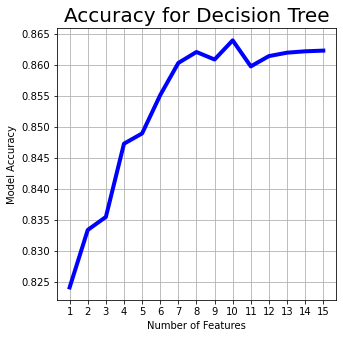

In [16]:
graph_accuracies(dtree_accuracy, "Decision Tree")

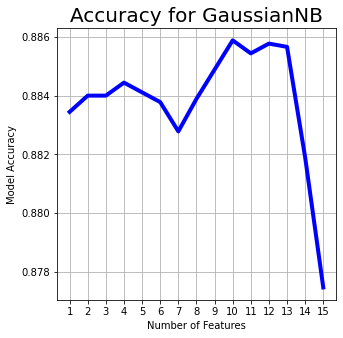

In [17]:
graph_accuracies(gnb_accuracy, "GaussianNB")

Now to Select The Best Features For the Models


### Setting Up Functions to Better Look into the Decision tree and the Gaussian Models
#### Fitting Models

In [18]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Tree Depth:", clf.tree_.max_depth)

Accuracy: 0.8635408603339599
Tree Depth: 29


In [19]:
# treeStruct = export_text(clf)
# print(treeStruct)

In [20]:
clf2 = tree.DecisionTreeClassifier(random_state=0, max_depth=10)
clf2 = clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Tree Depth:", clf2.tree_.max_depth)
print("Important Features:", clf2.feature_importances_)

Accuracy: 0.8942828707287405
Tree Depth: 10
Important Features: [0.06748149 0.01203522 0.01100038 0.00958603 0.00083134 0.05294651
 0.03552026 0.00608226 0.03379701 0.05427403 0.12596836 0.41254568
 0.00883265 0.05208453 0.11701425]


In [21]:
def train_data(df, drops=None):
    """This Function splits the data to train and test the data. It also an element for being able to
    drop certain rows."""
    # Y is the classification
    Y = df['y'].tolist()
    X = df.copy()
    X = X.drop(columns=["y"])
    if drops != None:
        X = X.drop(columns=drops)
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    return x_train, x_test, y_train, y_test, X

In [22]:
def decisionTree_Model(x_train, x_test, y_train, y_test, X, yes_print=False):
    """This Function goes through building a decision tree and creating a confusion matrix
    computing accuracy, and listing the decision tree features and their importance"""
    # Building out a decision tree
    dtree = tree.DecisionTreeClassifier(criterion="gini")
    dtree = dtree.fit(x_train, y_train)
    y_predicted = dtree.predict(x_test)
    accuracy = accuracy_score(y_test, y_predicted)
    important = dtree.feature_importances_
    df_importance_list = []
    for i, v in enumerate(important):
        df_importance_list.append([X.columns[i], v])
    df_importance = pd.DataFrame(df_importance_list, columns=["FName", "Score"])
    df_importance.sort_values(by=['Score'], ascending=False, inplace=True)
    decisionTree_Model_Features = df_importance["FName"].tolist()
    if yes_print:
        print("DecisionTree Accuracy: ", accuracy)
        print("DecisionTree Confusion Matrix:")
        print(confusion_matrix(y_test, y_predicted))
        print("decision tree dtree feature importance:")
        print(df_importance)
    return accuracy, decisionTree_Model_Features

In [23]:
def GausianNB_Model(x_train, x_test, y_train, y_test, X, yes_print=False):
    """This Function goes through the GausianNB model and calculates the accuracy, computes the confusion matrix
    and then lists the Gaussian Model Features and their significance"""
    model2 = GaussianNB()
    model2.fit(x_train, y_train)
    gausianNB_predicted = model2.predict(x_test)
    accuracy = accuracy_score(y_test, gausianNB_predicted)
    imps = permutation_importance(model2, x_test, y_test)
    df_Gausian_Feature_Importance_List = []
    Gausian_Feature_Importance_List =  imps.importances_mean.tolist()
    for row in enumerate(Gausian_Feature_Importance_List):
        df_Gausian_Feature_Importance_List.append([X.columns[row[0]], row[1]])
    df_Gausian_Feature_Importance = pd.DataFrame(df_Gausian_Feature_Importance_List, columns=["Feature", "Significance"])
    df_Gausian_Feature_Importance.sort_values(by=["Significance"], ascending=False, inplace=True)
    GausianND_Features = df_Gausian_Feature_Importance["Feature"].tolist()
    if yes_print:
        print('\nconfusion_matrix from Gaussian naive bayes:')
        print(confusion_matrix(y_test, gausianNB_predicted))
        print('accuracy = ' + str(accuracy))
        print("gausianNB feature importance:")
        print(df_Gausian_Feature_Importance)
    return accuracy, GausianND_Features

In [24]:
def backward_selection(accuracy, features, selection, df, model):
    """This is a backward selection model that removes one feature at a time to see if we can improve the
    accuracy of the model. Once any improvement is reached the function returns which feature that was dropped
    that improves the model. The features that were included and the accuracy of the new model"""
    features_loop = [word for word in features if word not in selection]
    accuracy_start = accuracy
    for feature in features_loop:
        x_train, x_test, y_train, y_test, X = train_data(df, [feature] + selection)  # Dropping selection and feature
        if model == 1:  # 1 For decisionTree
            new_accuracy, new_features = decisionTree_Model(x_train, x_test, y_train, y_test, X, False)
        else:
            new_accuracy, new_features = GausianNB_Model(x_train, x_test, y_train, y_test, X, False)
        if new_accuracy >= accuracy_start:
            print("Accuracy:", new_accuracy, "\nFeatures:", new_features,"\nDropped Feature:", feature)
            return
    return "No Improvement"

In [25]:
def forward_selection(accuracy, features, selection, df, model):
    """This is a backward selection model that removes one feature at a time to see if we can improve the
    accuracy of the model. Once any improvement is reached the function returns which feature that was dropped
    that improves the model. The features that were included and the accuracy of the new model"""
    features_loop = [word for word in features if word not in selection]
    best_accuracy = accuracy
    for feature in features_loop:
        drop_features = [word for word in features if word not in [feature] + selection]
        x_train, x_test, y_train, y_test, X = train_data(df, drop_features)  # Dropping selection and feature
        if model == 1:  # 1 For decisionTree
            new_accuracy, new_features = decisionTree_Model(x_train, x_test, y_train, y_test, X, False)
        else:
            new_accuracy, new_features = GausianNB_Model(x_train, x_test, y_train, y_test, X, False)
        if new_accuracy >= best_accuracy:
            best_accuracy = new_accuracy
            add_feature = feature
    if best_accuracy > accuracy:
            print("Accuracy:", best_accuracy, "\nAdd Feature:", add_feature, "\nModel Features", [add_feature] + selection)
    else:
        return "No Improvement"

In [26]:
# Dropping Rain Today
x_train, x_test, y_train, y_test, X = train_data(df_b)

# Decision Tree Model
dt_a, dt_f = decisionTree_Model(x_train, x_test, y_train, y_test, X, True)

DecisionTree Accuracy:  0.8635408603339599
DecisionTree Confusion Matrix:
[[7324  656]
 [ 578  485]]
decision tree dtree feature importance:
        FName     Score
11   duration  0.296549
5     balance  0.123322
10      month  0.102925
0         age  0.095055
9         day  0.094529
14   poutcome  0.060507
1         job  0.048802
13   previous  0.036116
12   campaign  0.033984
3   education  0.027874
6     housing  0.024090
8     contact  0.022019
2     marital  0.021672
7        loan  0.010346
4     default  0.002211


Starting the Decision tree with backward selection

In [27]:
features = df_b.columns.tolist()
features.pop(-1)
accuracy = 0.8635408603339599
selection = []

backward_selection(accuracy, features, selection, df_b, 1)

Accuracy: 0.8713922370894615 
Features: ['duration', 'balance', 'month', 'day', 'poutcome', 'job', 'campaign', 'education', 'contact', 'marital', 'housing', 'previous', 'loan', 'default'] 
Dropped Feature: age


In [28]:
selection = ['age']
accuracy = 0.8713922370894615
backward_selection(accuracy, features, selection, df_b, 1)

'No Improvement'

Starting the Decision tree with forward selection

In [29]:
forward_selection(accuracy, features, selection, df_b, 1)

Accuracy: 0.8877584872276899 
Add Feature: poutcome 
Model Features ['poutcome', 'age']


In [30]:
selection = ['poutcome', 'age']
accuracy = 0.8877584872276899
forward_selection(accuracy, features, selection, df_b, 1)

Accuracy: 0.8879796527700984 
Add Feature: contact 
Model Features ['contact', 'poutcome', 'age']


In [31]:
selection = ['contact', 'poutcome', 'age']
accuracy = 0.8879796527700984
forward_selection(accuracy, features, selection, df_b, 1)

Accuracy: 0.8880902355413026 
Add Feature: default 
Model Features ['default', 'contact', 'poutcome', 'age']


In [32]:
selection = ['default', 'contact', 'poutcome', 'age']
accuracy = 0.8880902355413026
forward_selection(accuracy, features, selection, df_b, 1)

'No Improvement'

Looking at the Decision Tree we can conclude that the highest accuracy
that we reached was .888090 with ['default', 'contact', 'poutcome', 'age'] as the selection
The backward model stopped at only removing age with an accuracy of 0.8713922370894615

Now to look at the Gaussian model with backward selection

In [33]:
x_train, x_test, y_train, y_test, X = train_data(df_b)
gm_a, gm_f = GausianNB_Model(x_train, x_test, y_train, y_test, X, True)


confusion_matrix from Gaussian naive bayes:
[[7379  601]
 [ 610  453]]
accuracy = 0.8660842640716576
gausianNB feature importance:
      Feature  Significance
11   duration      0.044830
0         age      0.004689
6     housing      0.002964
7        loan      0.000487
2     marital      0.000199
3   education     -0.000044
8     contact     -0.000111
1         job     -0.000221
4     default     -0.000221
12   campaign     -0.000464
13   previous     -0.001062
10      month     -0.001150
9         day     -0.001349
14   poutcome     -0.002256
5     balance     -0.002654


In [34]:
selection = ["education","contact","day","loan","previous","month", "balance", "poutcome"]
accuracy = 0.8660842640716576
backward_selection(accuracy, features, selection, df_b, 0)

Accuracy: 0.8802388587858012 
Features: ['duration', 'housing', 'job', 'marital', 'default', 'campaign'] 
Dropped Feature: age


In [35]:
selection = ["education","contact","day","loan","previous","month", "balance", "poutcome","age"]
accuracy = 0.8802388587858012
backward_selection(accuracy, features, selection, df_b, 0)

Accuracy: 0.8814552692690479 
Features: ['duration', 'housing', 'campaign', 'marital', 'job'] 
Dropped Feature: default


In [36]:
selection = ["education","contact","day","loan","previous","month", "balance", "poutcome","age",
             "default"]
accuracy = 0.8814552692690479
backward_selection(accuracy, features, selection, df_b, 0)

Accuracy: 0.8815658520402522 
Features: ['duration', 'housing', 'marital', 'campaign'] 
Dropped Feature: job


In [37]:
selection = ["education","contact","day","loan","previous","month", "balance", "poutcome","age",
             "default","job"]
accuracy = 0.8815658520402522
backward_selection(accuracy, features, selection, df_b, 0)

Accuracy: 0.8817870175826606 
Features: ['duration', 'housing', 'campaign'] 
Dropped Feature: marital


In [38]:
selection = ["education","contact","day","loan","previous","month", "balance", "poutcome","age",
             "default","job", "marital"]
accuracy = 0.8817870175826606
backward_selection(accuracy, features, selection, df_b, 0)

Accuracy: 0.8824505142098861 
Features: ['housing', 'campaign'] 
Dropped Feature: duration


In [39]:
selection = ["education","contact","day","loan","previous","month", "balance", "poutcome","age",
             "default","job", "marital", "duration"]
accuracy = 0.8824505142098861
backward_selection(accuracy, features, selection, df_b, 0)

Accuracy: 0.8824505142098861 
Features: ['campaign'] 
Dropped Feature: housing


Backward selection with the gaussiannb model shows that Campaign solely is the best predictor

Now to Look at the GaussianNB model with forward selection

In [40]:
accuracy = 0
selection = []
forward_selection(accuracy, features, selection, df_b, 0)

Accuracy: 0.8834457591507243 
Add Feature: duration 
Model Features ['duration']


In [41]:
accuracy = 0.8834457591507243
selection = ['duration']
forward_selection(accuracy, features, selection, df_b, 0)

Accuracy: 0.8854362490324007 
Add Feature: contact 
Model Features ['contact', 'duration']


In [42]:
accuracy = 0.8854362490324007
selection = ['contact', 'duration']
forward_selection(accuracy, features, selection, df_b, 0)

Accuracy: 0.8857679973460135 
Add Feature: age 
Model Features ['age', 'contact', 'duration']


In [43]:
accuracy = 0.8857679973460135
selection = ['age', 'contact', 'duration']
forward_selection(accuracy, features, selection, df_b, 0)

'No Improvement'

The Forward Selection with the Gaussian model found the greatedst accuracy to be
0.8857679973460135  with ['age', 'contact', 'duration'] as variables

### K-Means
For K-means we will first use the scalar.

In [44]:
df_c_scaled = df_b.copy()
df_c_scaled[df_c_scaled.columns] = StandardScaler().fit_transform(df_c_scaled)

Running K-Means through PCA

In [45]:
for i in range(1,16):
    pca = PCA(n_components=i)
    pca_result = pca.fit_transform(df_c_scaled)
    # print("Explained variation per principal component: {}".format(pca.explained_variance_ratio_))
    print("Cumulative variance explained by {} principal components: {:.2%}".format(i, np.sum(pca.explained_variance_ratio_)))

Cumulative variance explained by 1 principal components: 11.55%
Cumulative variance explained by 2 principal components: 21.63%
Cumulative variance explained by 3 principal components: 30.90%
Cumulative variance explained by 4 principal components: 39.55%
Cumulative variance explained by 5 principal components: 46.84%
Cumulative variance explained by 6 principal components: 53.56%
Cumulative variance explained by 7 principal components: 59.89%
Cumulative variance explained by 8 principal components: 65.71%
Cumulative variance explained by 9 principal components: 71.45%
Cumulative variance explained by 10 principal components: 76.71%
Cumulative variance explained by 11 principal components: 81.85%
Cumulative variance explained by 12 principal components: 86.74%
Cumulative variance explained by 13 principal components: 90.52%
Cumulative variance explained by 14 principal components: 93.92%
Cumulative variance explained by 15 principal components: 97.21%


K-Means Does best when it is reduced down to a minimal amount of clusters, Unfortunatel
This is not the case with this data set

Now to look at the k means inertias

In [46]:
pca = PCA(n_components=16)
principalComponents = pca.fit_transform(df_c_scaled)
PCA_components = pd.DataFrame(principalComponents)

inertias = []
for k in range(1,16):
    """Creating a K means Clustering"""
    model = KMeans(n_clusters=k)
    model.fit(PCA_components.iloc[:,:3])
    inertias.append(model.inertia_)

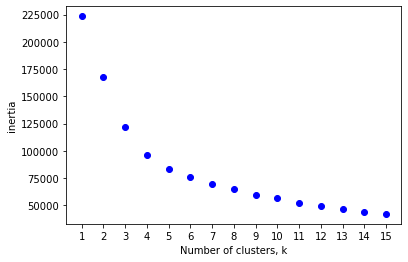

In [47]:
x = [i for i in range(1,16)]
plt.plot(x, inertias, 'o', color='b')
plt.xlabel("Number of clusters, k")
plt.ylabel("inertia")
plt.xticks(x)
plt.show()



The K-means doesn't seem to be the best fit for this data set. But just to show that I know how to graph it.
Below is a k-means look. The elbow on the graph above shows that

Looking at the inerta we see an elbow at three clusters. We will there for use this in our k-means model

### TODO REVISIT LATER

In [48]:
# kmeans = KMeans(n_clusters=2, random_state=0).fit(df_c_scaled)
# k_prediction = kmeans.labels_
# len(k_prediction)


### DBSCAN

Now for looping through DB Scan